In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import exposure
import time
import scipy
%matplotlib inline
plt.rcParams.update({'image.interpolation': None})

In [2]:
I = np.asarray(imageio.imread('hidden-symbols.tif'))

## 03-04 Local Histogram Equalization

### (a) Characteristics of the Image

Text(0.5, 1.0, 'Image histogram')

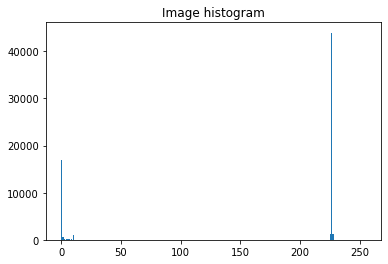

In [16]:
h,b,p = plt.hist(I.flatten(),bins=256,range=(0,255))
plt.title('Image histogram')

Calculate the global mean of image

In [17]:
h_normlized = h/(I.shape[0]*I.shape[1])
h1 = np.zeros(256)
for k in range(256):
    h1[k-1] = (k-1)*(h_normlized[k-1])
    m_g = h1[0:k-1].sum()
print(round(m_g))

161


Calculate the standard deviation of image

In [18]:
h2 = np.zeros(256)
for k in range(256):
    h2[k-1] = (((k-1)-m_g)**2)*h_normlized[k-1]
    st_g = np.sqrt(h2[0:k-1].sum())
print(round(st_g))

103


Calculate the maximum and minimum value of dark and light regions of image

In [19]:
Id=I[10:60, 10:60]
print(Id.min())
print(Id.max())

0
11


In [20]:
Il=I[70:100, 70:100]
print(Il.min())
print(Il.max())

0
228


the maximum and minimum intensity values of dark regions of the image is 11 and 0, respectively, and the maximum and minimum values are light regions of image is 228 and 0.

### (b) Adaptive Histogram Equalization

(-0.5, 255.5, 255.5, -0.5)

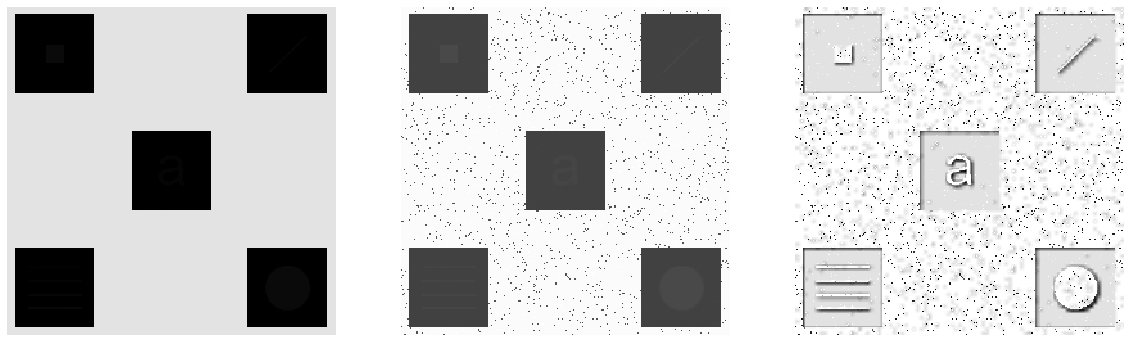

In [21]:
I2 = exposure.equalize_hist(I)*255
I3 = exposure.equalize_adapthist(I, kernel_size=3, clip_limit=0.9)*255
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(I2,cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(I3,cmap='gray',vmin=0,vmax=255)
plt.axis('off')


For exposure.equalize_adapthist, there is three parameters that can be tune to modify the result picture. These three parameters are kernel_size, clip_limit and nbins. Based on the textbook, the local histogram equalization is obtained with a neighborhood of size 3×3. It meas that the size of kernel is 3 because the default is 1/8 of image height by 1/8 of its width. The other parameter is clipping limit which is normalized between 0 and 1  and higher value gives more contrast so I chose 0.9.

### (c) Local Histogram Equalization

In [4]:
M = input("Enter the size of the local neighborhood ")
print("M = " + M)

Enter the size of the local neighborhood 3
M = 3


In [4]:
def histogram_equalize(I,h):
        h1 = h/(I.shape[0]*I.shape[1])
        T = np.zeros(h.shape)
        Iq = np.zeros(I.shape)
        for k in range(T.size):
            T[k] = (255*(h1[:k+1].sum())).astype(int)
            Iq[I==k] = T[k]
        return T, Iq


M = int(M)

Iq2 = np.zeros(I.shape)
center = int((M-1)/2)
start_time = time.time()
for i in range(I.shape[0]-2*center):
    for j in range(I.shape[1]-2*center):
        r = I[i:i+M, j:j+M].astype(float)
        h,_ = np.histogram(r.flatten(), bins=256, range=[0,255])
        T, Iq = histogram_equalize(r,h)
        Iq2[i, j] = Iq[center, center]
print("Running time:  %s seconds " % (time.time() - start_time))

Running time:  274.3699426651001 seconds 


Running time:  0.44028568267822266 seconds 


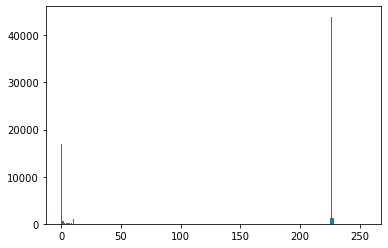

In [6]:
start_time = time.time() 
[hg, bins, patches] = plt.hist(I.flatten(), bins=256, range=[0,255])
[Tg, Ig] = histogram_equalize(I, hg)  
print("Running time:  %s seconds " % (time.time() - start_time))

(-0.5, 255.5, 255.5, -0.5)

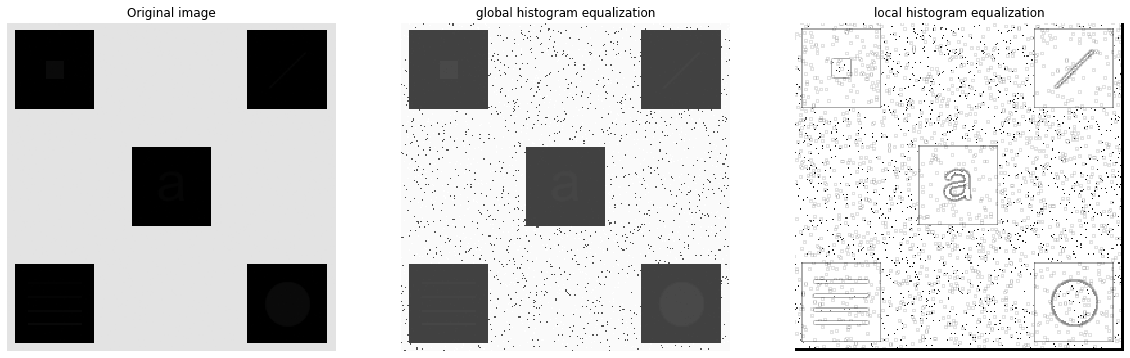

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title("Original image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(Ig,cmap='gray',vmin=0,vmax=255)
plt.title("global histogram equalization")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(Iq2,cmap='gray',vmin=0,vmax=255)
plt.title("local histogram equalization")
plt.axis('off')

The second figure is obtained by the global histogram equalization. This image is little noisy in light area but the objects in dark boxes become a little visible. This image shows significant enhancement of the noise.

The second image is obtianed by the local histogram equalization and this process takes much longer than the global histogram because the center of neighborhood region is moved pixle to pixle of the whole image. This image shows the significant details of dark boxes in the original image. For achieving this image, the histgram is repeatedly computed for all pixels in the neighbor region and this process help the appearance of imge details. 

### (d) Adaptive Processing

Running time:  423.0251603126526 seconds 


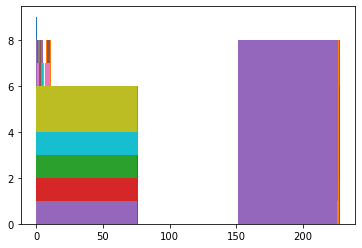

In [7]:
mg=161
k0=0
k1=0.25
sdg=103
k2=0
k3=0.1
c=22.8
M=int(M)

center = int((M-1)/2)
g = np.zeros(I.shape)

start_time = time.time() 
for i in range(I.shape[0]-2):
    for j in range(I.shape[1]-2):
        r = I[i:i+M, j:j+M]
        
        h,_,_ = plt.hist(r.flatten(),bins=M)
        h_normlized = h/(M*M)
        h1 = np.zeros(M)
        for k in range(M):
            h1[k-1] = (k-1)*(h_normlized[k-1])
            ms = h1[0:k-1].sum()
            
        h2 = np.zeros(M)
        for k in range(M):
            h2[k-1] = (((k-1)-ms)**2)*h_normlized[k-1]
            sds = np.sqrt(h2[0:k-1].sum())
         
        if ms>=k0*mg and \
           ms<=k1*mg and \
           sds>=k2*sdg and \
           sds<=k3*sdg:
            g[i,j]=c*I[i,j]
        else:
            g[i,j]=I[i,j]
print("Running time:  %s seconds " % (time.time() - start_time))

(-0.5, 255.5, 255.5, -0.5)

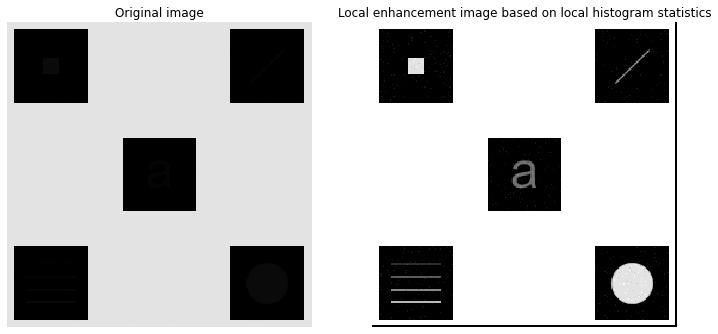

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title("Original image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(g,cmap='gray',vmin=0,vmax=255)
plt.title("Local enhancement image based on local histogram statistics")
plt.axis('off')

The second image is obtained from local enhancement using histogram statistics. This approach helps to enhance low-contrast details embedded in the background with similar intensity. So it causes the appearance of objects in dark boxes of images.

For this purpose, I choose a neighborhood of size 3×3 because this box size gives a good result in local histogram equalization. In addition, in this size box, the maximum number of possible different intensities in a region is 9. It means just only between 1 and 9 of the 256 bins of the histogram of the neighborhood will be nonzero which is enough for this picture to appear all the details in this image.

## 03-06 Blob Detection Using Spatial Averaging and Thresholding

### (a) Blob Detection on Blurred Image

In [32]:
I = np.asarray(imageio.imread('hickson-compact-group.tif'))/255

In [115]:
def kernel_guassian(m, st):
    x = np.linspace(-(m-1)/2., (m-1)/2., m)
    gauss = np.exp(-0.5*np.square(x)/np.square(st))
    kernel = np.outer(gauss, gauss)
    k = kernel/np.sum(kernel)
    return k
k = kernel_guassian(151, 25)

In [83]:
If = scipy.ndimage.convolve(I, k)

In [171]:
t = 0.4
It = np.where(If < t, 0, 1)

(-0.5, 2757.5, 2565.5, -0.5)

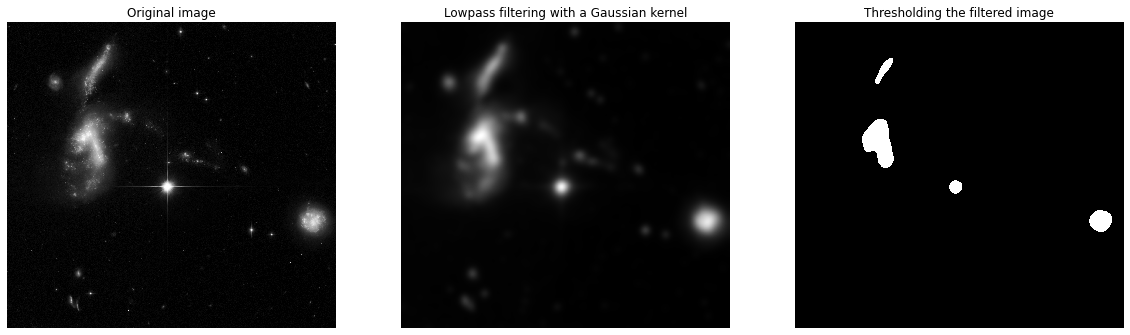

In [168]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(I,cmap='gray')
plt.title("Original image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(If,cmap='gray')
plt.title("Lowpass filtering with a Gaussian kernel")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(It,cmap='gray')
plt.title("Thresholding the filtered image")
plt.axis('off')

For defining the gaussian kernel, we need two parameters, the size of the kernel and standard deviation. Here, the size is 151 and the standard deviation is 25. So the size of the kernel is larger than 6×standeard deviation.
The default of scipy.ndimage.filters.convolve() is convolution and for correlation, we should use scipy.ndimage.filters.correlate1d().
Here, the gaussian filter convolves with the original image to blur the image and then uses thresholding to show the region with high intensities. Applying thresholding helps to appear just the high intensities of the original image.

### (b) Blob Detection on Original Image

In [174]:
t = 0.4
It2 = np.where(I < t, 0, 1)

(-0.5, 2757.5, 2565.5, -0.5)

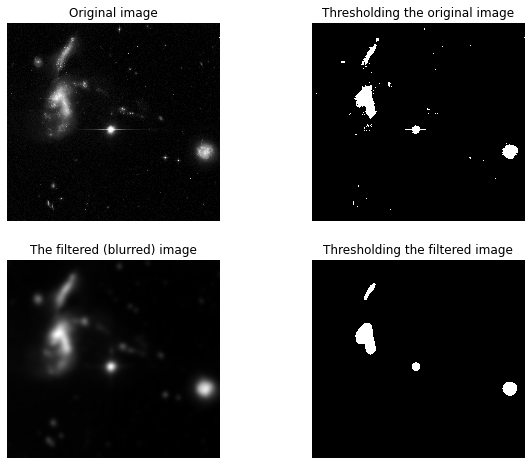

In [177]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(I,cmap='gray')
plt.title("Original image")
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(It2,cmap='gray')
plt.title("Thresholding the original image")
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(If,cmap='gray')
plt.title("The filtered (blurred) image")
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(It,cmap='gray')
plt.title("Thresholding the filtered image")
plt.axis('off')

With thresholding the original image, as shown, we have more white spots than thresholding the filtered image because the original image has not blurred or filtered so it has more variety in intensity values that higher than the threshold value. But the filtered image is blurred to remove details so the range of intensities is limited and fewer intensities are higher than the threshold value.

## 03-07 Image Sharpening using the Laplacian, Unsharp Masking, and Highboost Filtering

### (a) Sharpening with the 8-Neighbor Laplacian

(-0.5, 689.5, 799.5, -0.5)

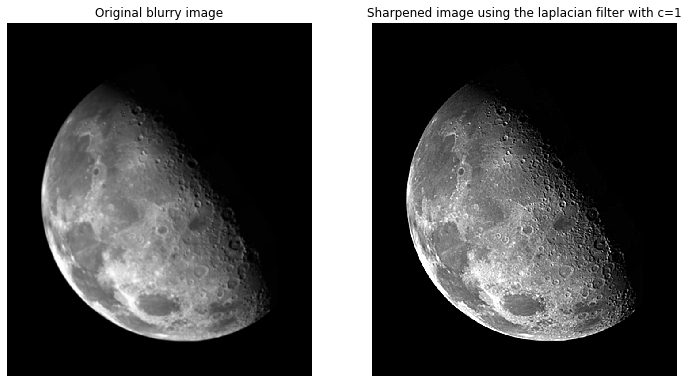

In [141]:
I = np.asarray(imageio.imread('blurry-moon.tif')).astype('float64')
k_laplacian = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
Il = scipy.ndimage.convolve(I, k_laplacian)
Il1 = I+Il

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title("Original blurry image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Il1,cmap='gray',vmin=0,vmax=255)
plt.title("Sharpened image using the laplacian filter with c=1")
plt.axis('off')

Laplacian is a derivative operator; its uses highlight gray level discontinuities in an image and try to deemphasize regions with slowly varying gray levels. This helps to appear edges more clearly in an image. As the center value of this kernel is positive and the others are negative, by adding the resulting image to the original image the image edges become sharp and distinguishing the areas with different intensities becomes more observable.

### (b) Using the Wrong Sign in Laplacian Sharpening

(-0.5, 689.5, 799.5, -0.5)

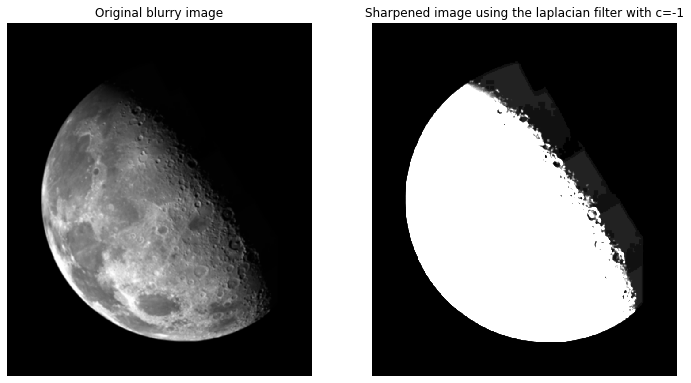

In [143]:
Il = I-Il

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title("Original blurry image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Il2,cmap='gray',vmin=0,vmax=255)
plt.title("Sharpened image using the laplacian filter with c=-1")
plt.axis('off')

The aim of applying laplacian filter is enhancing small details while the background tonality is reasonably preserved.
This produces inward and outward edges in an image. The kernel we use here is positive in center and negative in others element. For having sharper image, we should add the result image to roginal image. If we subsract from each other, the gray parts of image map to high contrast.

### (c) Unsharp Masking

(-0.5, 689.5, 799.5, -0.5)

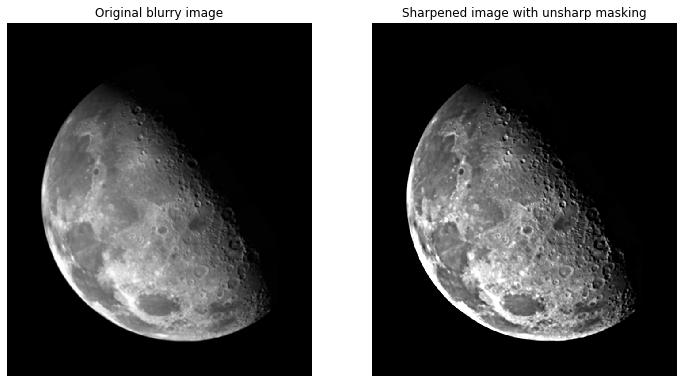

In [116]:
k2 = kernel_guassian(49, 8)
Ig = scipy.ndimage.convolve(I, k2)
Ig2 = (I-Ig) + I 

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title("Original blurry image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Ig2,cmap='gray',vmin=0,vmax=255)
plt.title("Sharpened image with unsharp masking")
plt.axis('off')

The size of figure 3.55(a) in textbook is 469×600 andthe kernel size is 31×31. It means this kernel is about 6% of width of image. The size of the blurry moon picture is 800×600 and I choose the 6% of its width, 48+1=49 as the kernel size. Based on textbook, the practical size of guassian kernel is on the order of 6*standard deviation, so I choose standard deviatian as 8 (49/6=8).

The comparison between two figures shows that the result image using unsharp masking is sharped because unsharp masking creats a blurred positive and using it in the original negative to create a sharper image.

### (d) Highboost Filtering

(-0.5, 689.5, 799.5, -0.5)

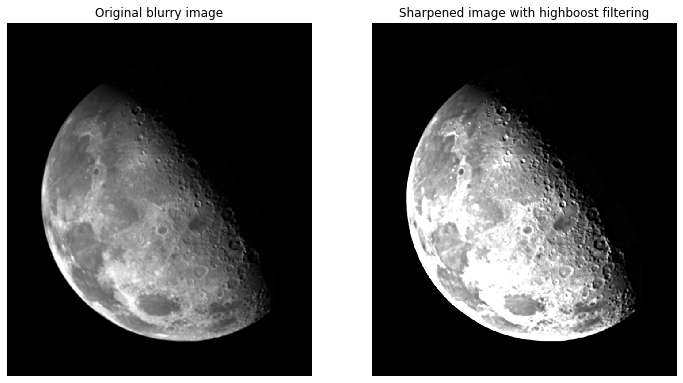

In [117]:
k = 1.5
Ig3 = (I-Ig) + k*I 

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title("Original blurry image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Ig3,cmap='gray',vmin=0,vmax=255)
plt.title("Sharpened image with highboost filtering")
plt.axis('off')

Here, for highboost filtering, I examined this method with k=2 and 3 but both of them provide the high contrast with losing the details of image. So I choose k=1.5 which gives the sharper feature than unsharp masking without losing the details of image.

### (e) Comparison

(-0.5, 689.5, 799.5, -0.5)

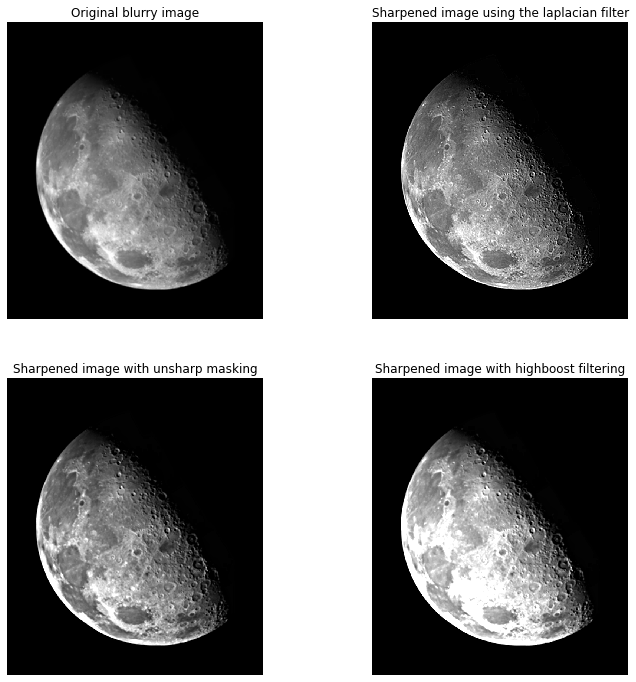

In [126]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title("Original blurry image")
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(Il1,cmap='gray',vmin=0,vmax=255)
plt.title("Sharpened image using the laplacian filter")
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(Ig2,cmap='gray',vmin=0,vmax=255)
plt.title("Sharpened image with unsharp masking")
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(Ig3,cmap='gray',vmin=0,vmax=255)
plt.title("Sharpened image with highboost filtering")
plt.axis('off')

It is shown that all three methods are able to sharp the blur image. But unsharp masking have sharper result than laplacian filter. Highboost filtering provides the shparpest one among others.

Laplacian sharpeing highlights gray-level of image and deemphasizes regions with slowly varying gray levels while unsharp masking and highboost filtering highlights the changes of intensities or changes of slopes occurs in the signal.